In [40]:
# @title *Importing Libraries*
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pyplot

from warnings import filterwarnings
filterwarnings(action='ignore')

In [6]:
# @title *Choose Dataset from Local Directory*"""
from google.colab import files
uploaded = files.upload()

Saving titanicsurvival.csv to titanicsurvival.csv


In [7]:
# @title *Load Dataset*"""
dataset = pd.read_csv('titanicsurvival.csv')

In [8]:
# @title *Summarize Dataset*"""
print(dataset.shape)
print(dataset.head(5))

(891, 5)
   Pclass     Sex   Age     Fare  Survived
0       3    male  22.0   7.2500         0
1       1  female  38.0  71.2833         1
2       3  female  26.0   7.9250         1
3       1  female  35.0  53.1000         1
4       3    male  35.0   8.0500         0


In [9]:
# @title Analyzing the dataset
male_psg = len(dataset[dataset['Sex'] == 'male'])
print("No of Males on Titanic:",male_psg)

No of Males on Titanic: 577


In [10]:
female_psg = len(dataset[dataset['Sex'] == 'female'])
print("No of Females on Titanic:",female_psg)

No of Females on Titanic: 314


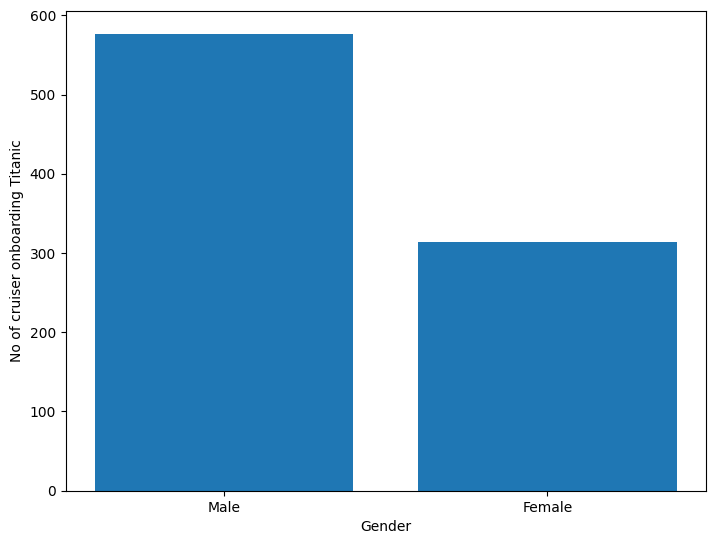

In [18]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
gender = ['Male','Female']
index = [577,314]
ax.bar(gender,index)
plt.xlabel("Gender")
plt.ylabel("No of cruiser onboarding Titanic")
plt.show()

In [12]:
survived = len(dataset[dataset['Survived'] == 1])
dead = len(dataset[dataset['Survived'] == 0])

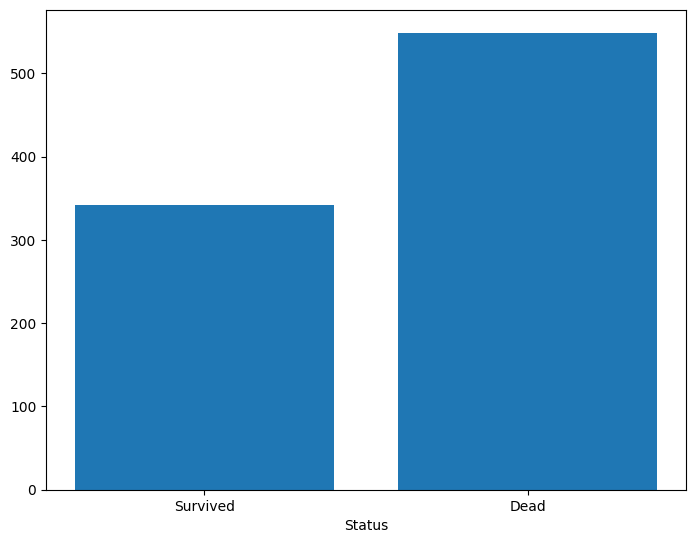

In [13]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
status = ['Survived','Dead']
ind = [survived,dead]
ax.bar(status,ind)
plt.xlabel("Status")
plt.show()

In [14]:
dataset.groupby('Sex')[['Survived']].mean()

,Survived
Sex,
female,0.742038
male,0.188908


Female Passsengers survived more than male passengers acc to above data

In [15]:
dataset[["Pclass", "Survived"]].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


Pclass 1 as more survivel rate then other two Pclass acc above data

Text(0.5, 1.0, 'Bar graph of cruiser who survived accrding to ticket class ')

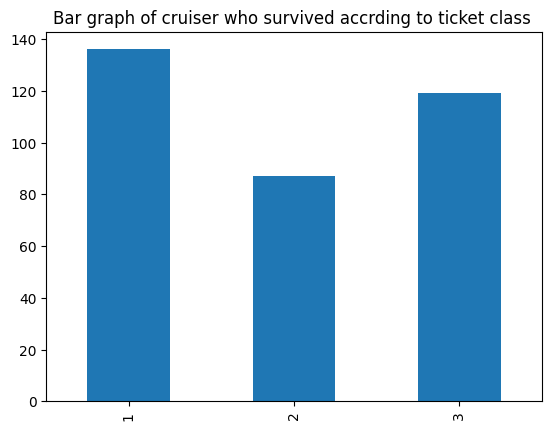

In [19]:
plt.figure(1)
dataset.loc[dataset['Survived'] == 1, 'Pclass'].value_counts().sort_index().plot.bar()
plt.title('Bar graph of cruiser who survived accrding to ticket class ')

Text(0.5, 1.0, "Bar graph of cruiser who couldn't survive accrding to ticket class")

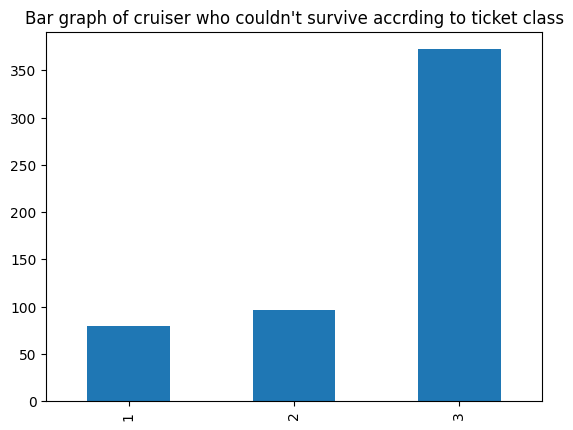

In [20]:
plt.figure(2)
dataset.loc[dataset['Survived'] == 0, 'Pclass'].value_counts().sort_index().plot.bar()
plt.title("Bar graph of cruiser who couldn't survive accrding to ticket class")

In [21]:
# @title *Mapping Text Data to Binary Value*"""
income_set = set(dataset['Sex'])
dataset['Sex'] = dataset['Sex'].map({'female' : 0, 'male' : 1}).astype(int)
print(dataset.head(5))


   Pclass  Sex   Age     Fare  Survived
0       3    1  22.0   7.2500         0
1       1    0  38.0  71.2833         1
2       3    0  26.0   7.9250         1
3       1    0  35.0  53.1000         1
4       3    1  35.0   8.0500         0


In [22]:
# @title *Segregate Dataset into X(Input/IndependentVariable) & Y(Output/DependentVariable)*"""
X = dataset.drop('Survived', axis = 'columns')
X

,Pclass,Sex,Age,Fare
0,3,1,22.0,7.2500
1,1,0,38.0,71.2833
2,3,0,26.0,7.9250
3,1,0,35.0,53.1000
4,3,1,35.0,8.0500
...,...,...,...,...
886,2,1,27.0,13.0000
887,1,0,19.0,30.0000
888,3,0,NaN,23.4500
889,1,1,26.0,30.0000


In [23]:
# @title Y(Output/DependentVariable)
Y = dataset.Survived
Y


0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [24]:
# @title Finding & Removing NA values from our Features X
X.columns[X.isna().any()]

Index(['Age'], dtype='object')

Age column as NaN/Null values

In [25]:
X.Age = X.Age.fillna(X.Age.mean())

Repalce NaN with mean of that column

In [26]:
# @title Test again to check any na value
X.columns[X.isna().any()]

Index([], dtype='object')

No other Null values found

In [65]:
# @title Splitting Dataset into Train & Test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, train_size=0.25, random_state=0)


In [52]:
# @title *Validating some ML algorithm by its accuracy - Model Score*
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold

In [53]:
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))

LR: 0.810870
KNN: 0.684585
CART: 0.716601
NB: 0.797628
SVM: 0.715810


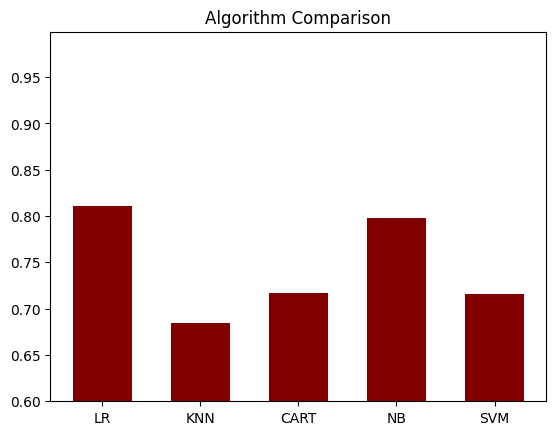

In [77]:
results = []
names = []
res = []
for name, model in models:
    kfold = StratifiedKFold(n_splits=10, random_state=None)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    res.append(cv_results.mean())
    print('%s: %f' % (name, cv_results.mean()))

pyplot.ylim(.600, .999)
pyplot.bar(names, res, color ='maroon', width = 0.6)

pyplot.title('Algorithm Comparison')
pyplot.show()



In [78]:
# @title *Training & Prediction using the algorithm with high accuracy*
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

from sklearn.metrics import accuracy_score,confusion_matrix
print("Accuracy Score:",accuracy_score(y_test,y_pred))
cn = confusion_matrix(y_test, y_pred)
print("Confusion Matrix")
print(cn)

Accuracy Score: 0.7713004484304933
Confusion Matrix
[[329  91]
 [ 62 187]]


In [ ]:
pclassNo = int(input("Enter Person's Pclass number: "))
gender = int(input("Enter Person's Gender 0-female 1-male(0 or 1): "))
age = int(input("Enter Person's Age: "))
fare = float(input("Enter Person's Fare: "))
person = [[pclassNo,gender,age,fare]]
result = model.predict(person)
print(result)

if result == 1:
  print("Person might be Survived")
else:
  print("Person might not be Survived")


Enter Person's Pclass number: 2
Enter Person's Gender 0-female 1-male(0 or 1): 0
Enter Person's Age: 55
Enter Person's Fare: 37
[1]
Person might be Survived


#Hence I will use LogisticRegression algorithms for training my model.